In [1]:
import acl
import cv2
from PIL import Image, ImageDraw
import sys
# define acllite library path
sys.path.append('../../Common/acllite')
# modules of acllite library
from acllite_model import AclLiteModel
from acllite_resource import AclLiteResource
from src.model import preprocessing, postprocessing

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# define device id & model path
device_id = 0
model_path = "model/yolov7.om"

# define image & coco_names paths
image_path = "../../Common/data/kite.jpg"
coco_names_path = "../../Common/data/coco.names"

In [4]:
with open(coco_names_path) as fd:
    coco_labels = fd.readlines()

coco_labels = [i[:-1] for i in coco_labels][0:]

In [5]:
# initialize acllite library
acl_resource = AclLiteResource()
acl_resource.init()

# load *.om model
model = AclLiteModel(model_path, device_id)

init resource stage:
Init resource success
Init model resource start...
[AclLiteModel] create model output dataset:
malloc output 0, size 8568000
Create model output dataset success
Init model resource success


In [6]:
# Read image
img_org_bgr = cv2.imread(image_path)
# store original image sizes for postprocessing
height_original, width_original, _ = img_org_bgr.shape

In [7]:
# 1) pre-processing stage
data,img_resized,w,h = preprocessing(img_org_bgr,model._model_desc)

model input size 1
input  0
model input dims ({'name': 'images', 'dimCount': 4, 'dims': [1, 3, 640, 640]}, 0)
model input datatype 0
model output size 1
output  0
model output dims ({'name': 'Concat_344:0:output', 'dimCount': 3, 'dims': [1, 25200, 85]}, 0)
model output datatype 0
[Model] class Model init resource stage success
model_h,model_w 640 640
resized (900, 1352, 3)
transpose (3, 640, 640)
cont array (3, 640, 640)


In [8]:
%timeit -n 10 -r 3
# 2) model execution(forward) stage
result_list = model.execute([data,]) 

In [9]:
# 3) post-processing the raw predictions
bboxes = postprocessing(result_list[0],img_resized,w,h)

In [10]:
img = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
img = Image.fromarray(img)
img1 = ImageDraw.Draw(img)

for bbox in bboxes:
    img1.rectangle(list(bbox[:4]), outline ="red", width=1)
    print(bbox[:4], bbox[4], bbox[5], coco_labels[int(bbox[5])])

[281.0, 57.0, 317.0, 108.0] 0.9316406 33 kite
[54.0, 436.0, 79.0, 543.0] 0.9091797 0 person
[132.0, 169.0, 145.0, 200.0] 0.9073162 33 kite
[102.0, 496.0, 128.0, 610.0] 0.8925781 0 person
[273.0, 245.0, 284.0, 263.0] 0.86841774 33 kite
[513.0, 280.0, 522.0, 301.0] 0.8521943 33 kite
[39.0, 361.0, 50.0, 403.0] 0.8178711 0 person
[143.0, 267.0, 155.0, 294.0] 0.79589844 33 kite
[221.0, 242.0, 229.0, 255.0] 0.7797241 33 kite
[246.0, 360.0, 252.0, 376.0] 0.75512123 0 person
[18.0, 363.0, 27.0, 396.0] 0.70947266 0 person
[253.0, 366.0, 262.0, 379.0] 0.6990237 0 person
[84.0, 385.0, 90.0, 408.0] 0.6946335 0 person
[164.0, 346.0, 169.0, 358.0] 0.58860254 0 person
[11.0, 377.0, 18.0, 396.0] 0.56968594 0 person


In [11]:
img = img.resize((width_original,height_original))

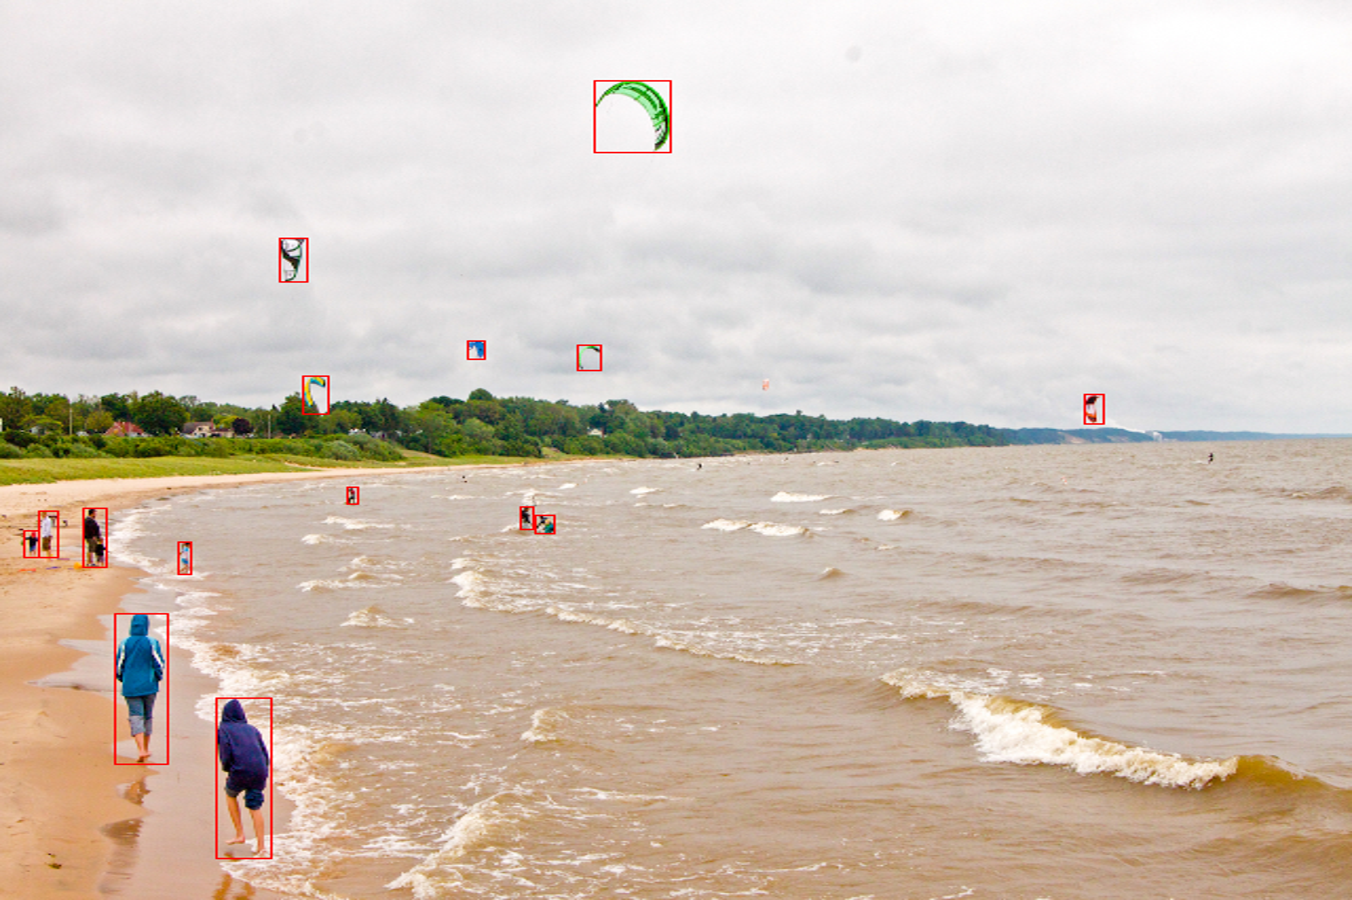

In [12]:
img